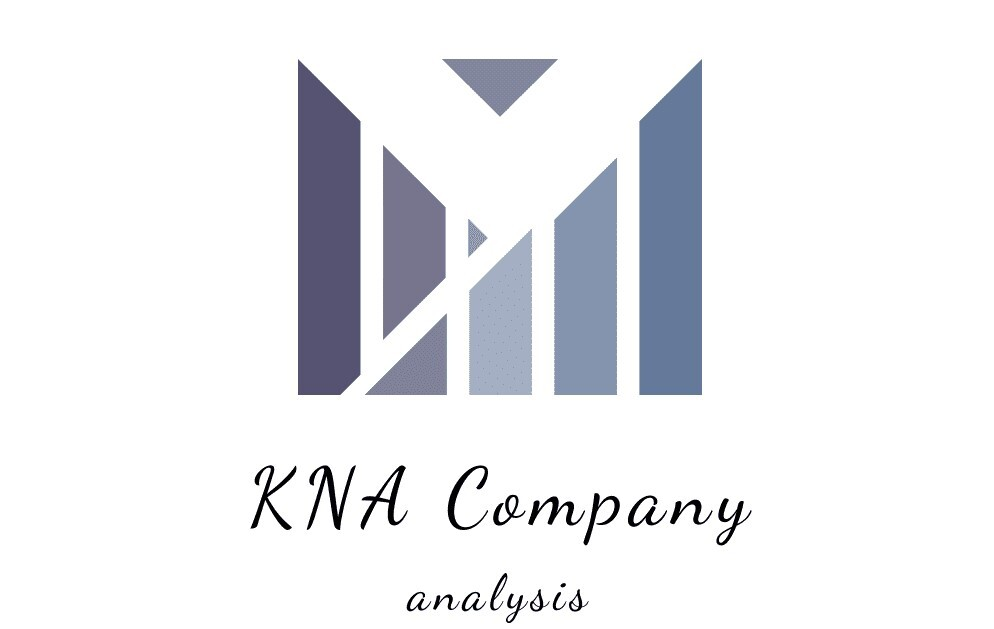

#  <a name=Appendix>Appendix:</a>

- Clic on the links:
>1. <a href=#Install>Install Libraries</a>
>2. <a href=#imports>Imports</a>
>3. <a href=#def>Helper Function</a>
>4. <a href=#Load>Load Data</a>
>5. <a href=#claen>Data claen and preprocessing</a>
>6. <a href=#Visualize>Visualize</a>
>7. <a href=#NLP>Natural Language Processing (NLP)</a>  
>8. <a href=#model>Models</a>
>9. <a href=#Case>Test Case</a>
>10. <a href=#con>Conclusion</a>

_______________________


# <a name='Install'>Install Libraries</a>

In [1]:
# !pip install pyarabic
# !pip install tashaphyne
# !pip install wordcloud
# !pip install farasapy
# !pip install qalsadi


# !pip install libqutrub
# !pip install Naftawayh

# !pip install corextopic

 #### <a href='#Appendix'>Return to Appendix </a> 

_______________________


# <a name='imports'>Libraries Imports</a> 

In [2]:
from tashaphyne.stemming import ArabicLightStemmer

import libqutrub.conjugator
import naftawayh.wordtag as wordtag
import tashaphyne.stemming

import plotly.graph_objs as go
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF

from pyarabic.araby import strip_tatweel, strip_shadda
from farasa.pos import FarasaPOSTagger
from farasa.ner import FarasaNamedEntityRecognizer
from farasa.diacratizer import FarasaDiacritizer
from farasa.segmenter import FarasaSegmenter
from farasa.stemmer import FarasaStemmer
import qalsadi.lemmatizer

print("importing......", flush=True)
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix, classification_report, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_score, fbeta_score
from sklearn.naive_bayes import MultinomialNB

from sklearn.naive_bayes import GaussianNB

import numpy as np
import pandas as pd
#import re, nltk, spacy, gensim

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

import arabic_reshaper
import pandas as pd
from wordcloud import WordCloud
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display

import re
import string
import sys
import argparse

import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
#import re, nltk, spacy, gensim

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

from corextopic import corextopic as ct
from corextopic import vis_topic as vt

print("[Done]")

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

importing......
[Done]


 #### <a href='#Appendix'>Return to Appendix </a> 

_______________________


# <a name='def'>Helper function</a> 

In [3]:
def preprocess(text):
    text = text.lower() #lowercase text
    text=text.strip()  #get rid of leading/trailing whitespace 
    text=re.compile('<.*?>').sub('', text) #Remove HTML tags/markups
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  #Replace punctuation with space. Careful since punctuation can sometime be useful
    text = re.sub('\s+', ' ', text)  #Remove extra space and tabs
    text = re.sub(r'\[[0-9]*\]',' ',text) #[0-9] matches any digit (0 to 10000...)
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) #matches any digit from 0 to 100000..., \D matches non-digits
    text = re.sub(r'\s+',' ',text) #\s matches any whitespace, \s+ matches multiple whitespace, \S matches non-whitespace 
    return text

def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('arabic')]
    return ' '.join(a)



lemmer = qalsadi.lemmatizer.Lemmatizer()

def lemmatizer(string):
    lemmas = lemmer.lemmatize_text(string)
    a=[lemmer.lemmatize(i) for i in word_tokenize(string) ]
    return " ".join(a)


def data_cleaning(text):
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'^http?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"https\S+", "", text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub("(\s\d+)","",text) 
    text = re.sub(r"$\d+\W+|\b\d+\b|\W+\d+$", "", text)
    text = re.sub("\d+", " ", text)
    #text = ar.strip_tashkeel(text)
    #text = ar.strip_tatweel(text)
    text = text.replace("#", " ");
    text = text.replace("@", " ");
    text = text.replace("_", " ");
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
#     em = text
#     em_split_emoji = emoji.get_emoji_regexp().split(em)
#     em_split_whitespace = [substr.split() for substr in em_split_emoji]
#     em_split = functools.reduce(operator.concat, em_split_whitespace)
#    text = " ".join(em_split)
    text = re.sub(r'(.)\1+', r'\1', text)
#    text_stem = " ".join([st.stemWord(i) for i in text.split()])
#    text = text +" "+ text_stem
    text = text.replace("آ", "ا")
    text = text.replace("إ", "ا")
    text = text.replace("أ", "ا")
    text = text.replace("ؤ", "و")
    text = text.replace("ئ", "ي")
    return text



def make_exprs(exprs_local: list):
    exprs = exprs_local
    list_metics = []
    list_models = []
    for model, metric in exprs:
        list_models.append(model)
        list_metics.append(metric)
    return list_models, pd.DataFrame(list_metics)
def model_eval(mdl_local, X_local, y_local, eval_name = "Train", bta=1):
    
    y_pred = mdl_local.predict(X_local)
    
    print(f"________________ {eval_name} Metrics______________")
    acc = mdl_local.score(X_local , y_local)
    print("Accuarcy score:", acc)
    prec = precision_score(y_local, y_pred, average='macro' )
    print("Precision Score:", prec)
    recall = recall_score(y_local, y_pred, average='macro')
    print("Recall Score:", recall)
    fbta = fbeta_score( y_local, y_pred, beta=bta, average='macro')
    print(f"F{bta} Score:", fbta)
    
    return {f"{eval_name}_acc":acc, f"{eval_name}_prec":prec, f"{eval_name}_recall":recall, f"{eval_name}_fbta":fbta}
    
    
def modeling(expr_name, mdl_local, X_train_local, y_train_local, X_test_local, y_test_local):

    mdl_local.fit(X_train_local, y_train_local)
    print(f"################### {expr_name} ###################")
    expr_metric_dict = model_eval(mdl_local, X_train_local, y_train_local, eval_name = "Train", bta=1)
    expr_metric_dict.update(model_eval(mdl_local, X_test_local, y_test_local, eval_name = "Test", bta=1))
    
    expr_metric_dict["expr_name"] = expr_name
    
    return mdl_local, expr_metric_dict


punctuations_list = '''`÷×؛<>()*&^%][»«ـ،"؟.,'{}~¦+|!”…“–ـ'''

arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)


def normalize_arabic(text):
    text = re.sub("[إآا]", "ا", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("گ", "ك", text)
    return text


def remove_diacritics(text):
    text = re.sub(arabic_diacritics, '', text)
    return text


def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)


def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

emoji_pattern = re.compile("["
                       u"\U0001F600-\U0001F64F"  # emoticons
                       u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                       u"\U0001F680-\U0001F6FF"  # transport & map symbols
                       u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                       u"\U00002702-\U000027B0"
                       u"\U000024C2-\U0001F251"
                       "]+", flags=re.UNICODE)  

def remove_emoji(string):
    return emoji_pattern.sub(r'', string)

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words=stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words=stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words=stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]



# function to display topics with words


def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
#         else:
#             print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
    

def display_top(model, feature_names, no_top_words, topic_names=None):
    
    my_dict = {'topic_0':'','topic_1':'','topic_2':'','topic_3':'','topic_4':''}
    ctr = 0
    for ix, topic in enumerate(model.components_):
                #if not topic_names or not topic_names[ix]:
#             print("\nTopic ", ix)
        txt = ",".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
        my_dict['topic_'+str(ctr)] = txt
        ctr+=1
#         print('words are::: ',txt)
    return my_dict

def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        

def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)        

 #### <a href='#Appendix'>Return to Appendix </a> 

_______________________


# <a name='Load'>Load Data </a> 

In [4]:
df = pd.read_csv('ar_reviews_100k.tsv', sep='\t', header=None)

In [5]:
df.head()

,0,1
0,label,text
1,Positive,ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...
2,Positive,أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...
3,Positive,هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...
4,Positive,خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...


In [6]:
df.columns = df.columns.astype(str)

In [7]:
df.columns = ['label', 'text']

In [8]:
df = df.iloc[1: , :]

In [9]:
df.head()

,label,text
1,Positive,ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...
2,Positive,أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...
3,Positive,هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...
4,Positive,خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...
5,Positive,ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...


 #### <a href='#Appendix'>Return to Appendix </a> 

_______________________


# <a name='claen'>Data claen and preprocessing </a>  

In [27]:
data = df

In [28]:
#Clean arabic text#

#Normalize letters
data['text'] = data['text'].apply(normalize_arabic)

#Remove Diacritics'Tashkeel'
data['text'] = data['text'].apply(remove_diacritics)

#Remove punctuations'Tarqeem'
data['text'] = data['text'].apply(remove_punctuations)

#Remove repeating characters
#data['text'] = data['text'].apply(remove_repeating_char)

#remove space trails
data['text'] = data['text'].apply(lambda x: str(x).replace('\n'," "))

#Remove Links
data['text'] = data['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

#Remove hashtags and special symbols
data['text'] = data['text'].apply(lambda x: str(x).replace('#',""))
data['text'] = data['text'].apply(lambda x: str(x).replace('_'," "))
data['text'] = data['text'].apply(lambda x: str(x).replace('-'," "))
data['text'] = data['text'].apply(lambda x: str(x).replace('//',""))
data['text'] = data['text'].apply(lambda x: str(x).replace(':',""))
#data['text'] = data['text'].apply(lambda x: str(x).replace('ى',""))
data['text'] = data['text'].apply(lambda x: str(x).replace('ال',""))
data['text'] = data['text'].apply(lambda x: str(x).replace('له',"الله"))


#Standardization for the Virus word


#Remove numbers
data['text'] = data['text'].str.replace('\d+', '')

#Remove Emojies
data['text'] = data['text'].apply(remove_emoji)



In [29]:
#Clean arabic text#
stopwords = set(nltk.corpus.stopwords.words('arabic'))
include_words = set(('و',"ب","انها","انه","شيء","انا","علي","أنه","او","مش","عم","اني","اللها","لى","شي","اله","كنت","فى","ان","الى"))
stopwords = stopwords.union(include_words)
# exclude_words = set(('كلا',"لات","لن","ليست","لم","لا","ليس","ليس"))
# stopwords = stopwords.symmetric_difference(exclude_words)
data['text_clean'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))
data[['text_clean','text']].head(20)

,text_clean,text
1,ممتاز نوعا نظافة وموقع وتجهيز وشاطيء مطعم,ممتاز نوعا ما نظافة وموقع وتجهيز وشاطيء مطعم
2,أسباب نجاح امارات شخص دولة يعشق ترابها نحب اما...,أحد أسباب نجاح امارات أن كل شخص في هذه دولة يع...
3,هادفة وقوية تنقلك صخب شوارع قاهرة هدوء جب شيشا...,هادفة وقوية تنقلك من صخب شوارع قاهرة ى هدوء ج...
4,خلصنا مبدءيا مستني ابهار زي فيل ازرق ميقراش اح...,خلصنا مبدءيا لي مستني ابهار زي فيل ازرق ميقرا...
5,ياسات جلوريا جزء يتجزأ دبي فندق متكامل خدمات م...,ياسات جلوريا جزء لا يتجزأ من دبي فندق متكامل ...
6,أسلوب كاتب راءع جدا عميق جدا قرأته عدة مرات طب...,أسلوب كاتب راءع جدا و عميق جدا قرأته عدة مرات ...
7,استثناءي هدوء جناح مسبح عدم وجود عازل جيد غرف ...,استثناءي هدوء في جناح مع مسبح عدم وجود عازل جي...
8,كتاب سيرة ذاتية للحداثة مملكة بلسان أبرز معاصر...,كتاب هو سيرة ذاتية للحداثة في مملكة بلسان أبرز...
9,أجمل قرأت رواية تستحق قراءة فعلا,من أجمل ما قرأت رواية تستحق قراءة فعلا
10,بشكل عام جيده تجاوب جيد جدا موظفي استقب وخدمة ...,بشكل عام جيده تجاوب جيد جدا من قبل موظفي است...


In [30]:
# count words frequency
freq = pd . Series ( ' ' . join (data[ 'text_clean' ]). split ()). value_counts ()[: 40 ]
freq


كتاب     36298
رواية    35179
جدا      34201
فندق     23215
الله     17458
كانت     14334
كاتب     13629
جيد      10091
موقع      9213
فقط       8336
غرف       8205
استقب     8196
قصة       8145
بشكل      7034
راءع      6936
اخر       6825
غرفة      6588
حياة      6510
نهاية     6491
كثير      6381
يوجد      6347
عمل       6206
قراءة     6171
جميل      6112
مكان      6069
ممتاز     5980
يكون      5965
حب        5703
كتب       5614
وقت       5600
عدم       5496
مرة       5486
روايه     5469
رغم       5220
فكرة      5172
نظافة     4853
وجود      4824
تكون      4746
مواقف     4745
اكثر      4724
dtype: int64

In [31]:
#cleaning data like removes the repeated char
data['text_clean'] = data['text_clean'].apply(lambda x: data_cleaning(x))

In [32]:
data[['text',"text_clean"]].head(40)

,text,text_clean
1,ممتاز نوعا ما نظافة وموقع وتجهيز وشاطيء مطعم,متاز نوعا نظافة وموقع وتجهيز وشاطيء مطعم
2,أحد أسباب نجاح امارات أن كل شخص في هذه دولة يع...,اسباب نجاح امارات شخص دولة يعشق ترابها نحب اما...
3,هادفة وقوية تنقلك من صخب شوارع قاهرة ى هدوء ج...,هادفة وقوية تنقلك صخب شوارع قاهرة هدوء جب شيشا...
4,خلصنا مبدءيا لي مستني ابهار زي فيل ازرق ميقرا...,خلصنا مبدءيا مستني ابهار زي فيل ازرق ميقراش اح...
5,ياسات جلوريا جزء لا يتجزأ من دبي فندق متكامل ...,ياسات جلوريا جزء يتجزا دبي فندق متكامل خدمات م...
6,أسلوب كاتب راءع جدا و عميق جدا قرأته عدة مرات ...,اسلوب كاتب راءع جدا عميق جدا قراته عدة مرات طب...
7,استثناءي هدوء في جناح مع مسبح عدم وجود عازل جي...,استثناءي هدوء جناح مسبح عدم وجود عازل جيد غرف ...
8,كتاب هو سيرة ذاتية للحداثة في مملكة بلسان أبرز...,كتاب سيرة ذاتية لحداثة ملكة بلسان ابرز معاصريه...
9,من أجمل ما قرأت رواية تستحق قراءة فعلا,اجمل قرات رواية تستحق قراءة فعلا
10,بشكل عام جيده تجاوب جيد جدا من قبل موظفي است...,بشكل عام جيده تجاوب جيد جدا موظفي استقب وخدمة ...


In [33]:
#data['text_clean'] = data['text_clean'].apply(lambda x: stem(x))

In [34]:
data[['text',"text_clean"]].head(40)

,text,text_clean
1,ممتاز نوعا ما نظافة وموقع وتجهيز وشاطيء مطعم,متاز نوعا نظافة وموقع وتجهيز وشاطيء مطعم
2,أحد أسباب نجاح امارات أن كل شخص في هذه دولة يع...,اسباب نجاح امارات شخص دولة يعشق ترابها نحب اما...
3,هادفة وقوية تنقلك من صخب شوارع قاهرة ى هدوء ج...,هادفة وقوية تنقلك صخب شوارع قاهرة هدوء جب شيشا...
4,خلصنا مبدءيا لي مستني ابهار زي فيل ازرق ميقرا...,خلصنا مبدءيا مستني ابهار زي فيل ازرق ميقراش اح...
5,ياسات جلوريا جزء لا يتجزأ من دبي فندق متكامل ...,ياسات جلوريا جزء يتجزا دبي فندق متكامل خدمات م...
6,أسلوب كاتب راءع جدا و عميق جدا قرأته عدة مرات ...,اسلوب كاتب راءع جدا عميق جدا قراته عدة مرات طب...
7,استثناءي هدوء في جناح مع مسبح عدم وجود عازل جي...,استثناءي هدوء جناح مسبح عدم وجود عازل جيد غرف ...
8,كتاب هو سيرة ذاتية للحداثة في مملكة بلسان أبرز...,كتاب سيرة ذاتية لحداثة ملكة بلسان ابرز معاصريه...
9,من أجمل ما قرأت رواية تستحق قراءة فعلا,اجمل قرات رواية تستحق قراءة فعلا
10,بشكل عام جيده تجاوب جيد جدا من قبل موظفي است...,بشكل عام جيده تجاوب جيد جدا موظفي استقب وخدمة ...


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 1 to 99999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       99999 non-null  object
 1   text        99999 non-null  object
 2   text_clean  99999 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


 #### <a href='#Appendix'>Return to Appendix </a> 

_______________________


# <a name='Visualize'>Visualize</a>

#### graphs for top frequent word and wordcloud

In [36]:

common_words = get_top_n_words(data['text_clean'], 30)
df2 = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

fig = go.Figure([go.Bar(x=df2['unigram'], y=df2['count'])])
fig.update_layout(title=go.layout.Title(text="Top 30 unigrams in the question text after removing stop words and lemmatization"))
fig.show()

In [37]:
common_words = get_top_n_bigram(data['text_clean'], 20)
df3 = pd.DataFrame(common_words, columns = ['bigram' , 'count'])

fig = go.Figure([go.Bar(x=df3['bigram'], y=df3['count'])])
fig.update_layout(title=go.layout.Title(text="Top 20 bigrams in the question text after removing stop words and lemmatization"))
fig.show()

In [38]:
common_words = get_top_n_trigram(data['text_clean'], 20)
df4 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df4['trigram'], y=df4['count'])])
fig.update_layout(title=go.layout.Title(text="Top 20 trigrams in the question text"))
fig.show()

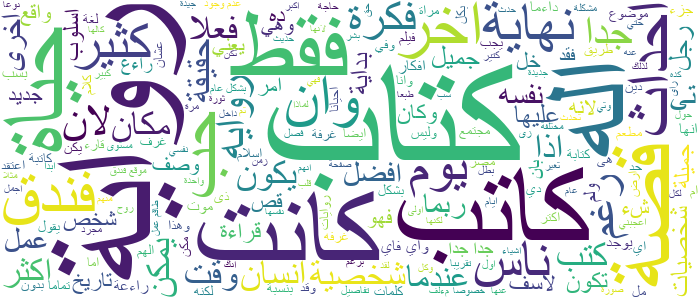

In [39]:
text = data['text_clean']
text = [''.join(sentence) for sentence in text]
text = ''.join(text)

reshaped_text = arabic_reshaper.reshape(text)
arabic_text = get_display(reshaped_text)
wordcloud = WordCloud(font_path='arial',width=700, height=300, background_color="white").generate(arabic_text)
wordcloud.to_image()

 #### <a href='#Appendix'>Return to Appendix </a> 

_______________________


# <a name='NLP'>Natural Language Processing (NLP)</a>

### Count victorizer and doc_word

In [40]:
vectorizer = CountVectorizer(stop_words=stopwords)
doc_word = vectorizer.fit_transform(data['text_clean'])
doc_word.shape

(99999, 250668)

In [41]:
pd.DataFrame(doc_word.toarray(), index= data['text_clean'], columns=vectorizer.get_feature_names()).head(10)

MemoryError: Unable to allocate 187. GiB for an array with shape (99999, 250668) and data type int64

#### This code we will have error when we run beacuse our devices

## LSA SVD

In [42]:
lsa = TruncatedSVD(4)
doc_topic = lsa.fit_transform(doc_word)

In [44]:
display_topics(lsa, vectorizer.get_feature_names(), 15)


Topic  0
رواية, كتاب, جدا, كاتب, كانت, احداث, قصة, اخر, نهاية, حياة, بشكل, قراءة, يكون, كثير, شخصية

Topic  1
رواية, احداث, شخصيات, نهاية, روايات, شخصية, قصة, بطل, لرواية, مراد, كاتبة, وصف, سرد, حبكة, تفاصيل

Topic  2
جدا, فندق, غرف, استقب, غرفة, موقع, جيد, يوجد, سيء, متاز, خدمة, مكان, نظافة, غرفه, فقط

Topic  3
فندق, كانت, انسان, حياة, اذا, حب, اخرى, يكون, عندما, وان, اخر, فقط, يوم, رجل, دين


* we noticed that tobics one and tobic two are same
-------------------------------------------------------------------------

## NMF

In [45]:
nmf_model = NMF(3)
doc_topic = nmf_model.fit_transform(doc_word)

In [46]:
display_topics(nmf_model, vectorizer.get_feature_names(), 20)


Topic  0
رواية, كاتب, كانت, احداث, قصة, نهاية, شخصيات, شخصية, جدا, حياة, اخر, بشكل, حب, فكرة, روايات, اسلوب, عمل, رغم, تكون, قراءة

Topic  1
كتاب, كاتب, كتب, كانت, قراءة, اخر, يكون, كثير, انسان, حياة, دين, جدا, وان, ناس, اسلام, اخرى, فصل, فكرة, بشكل, فقط

Topic  2
جدا, فندق, غرف, استقب, غرفة, موقع, جيد, يوجد, كانت, سيء, فقط, متاز, مكان, خدمة, نظافة, راءع, غرفه, ضعيف, وجود, مواقف


In [55]:
topic_nums = list(np.arange(2, 7, 1))

#nmf_models = []
for num in topic_nums:
    nmf = NMF(num)
    #nmf_models.append(nmf)
    nmf.fit_transform(doc_words)
    display_topics(nmf, tfidf.get_feature_names(), 14)
    print("------------------------------------------")


Topic  0
فندق, جدا, موقع, جيد, متاز, استقب, غرف, ضعيف, نظافة, سيء, يوجد, مرضي, غرفة, خدمة

Topic  1
رواية, كتاب, كاتب, جدا, كانت, قصة, احداث, اسلوب, قراءة, نهاية, كتب, فكرة, كثير, جميلة
------------------------------------------

Topic  0
فندق, موقع, جيد, متاز, غرف, استقب, نظافة, مرضي, يوجد, مقبول, غرفة, مواقف, حرم, خدمات

Topic  1
رواية, كتاب, كاتب, كانت, قصة, احداث, اسلوب, قراءة, نهاية, كتب, فكرة, كثير, اخر, راءع

Topic  2
جدا, ضعيف, سيء, سيءة, سيءه, استقب, قديم, جميل, سء, يعجبني, مكان, جيد, عادي, فاي
------------------------------------------

Topic  0
فندق, موقع, جيد, متاز, غرف, استقب, نظافة, مرضي, مقبول, يوجد, راءع, غرفة, خدمات, مواقف

Topic  1
رواية, كتاب, كاتب, كانت, قصة, احداث, اسلوب, قراءة, نهاية, كتب, فكرة, كثير, اخر, راءع

Topic  2
جدا, ضعيف, سيء, سيءة, سيءه, استقب, قديم, جميل, سء, يعجبني, مكان, جيد, فاي, عادي

Topic  3
مخيب, لامل, نظافة, غرف, سيء, موقع, استقب, يوجد, فقط, قديم, نظافه, اثاث, غرفه, سيءة
------------------------------------------

Topic  0
فندق, موقع, جيد, متا

In [56]:
nmf_model = NMF(3)
doc_topic = nmf_model.fit_transform(doc_words)

In [57]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["component_1","component_2","component_3"],
             columns = tfidf.get_feature_names())
topic_word

,ءا,ءاء,ءاءعة,ءاحلام,ءاخر,ءاسفت,ءاصبحت,ءافرادا,ءامنت,ءامنوا,...,يوى,يوىء,يويا,يويده,يويك,يوينو,يويها,يويوبيا,يويوعدني,يى
component_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
component_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
component_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
display_topics(nmf_model, tfidf.get_feature_names(), 20)


Topic  0
فندق, موقع, جيد, متاز, غرف, استقب, نظافة, مرضي, يوجد, مقبول, غرفة, مواقف, حرم, خدمات, سعر, راءع, عدم, خدمة, افطار, طاقم

Topic  1
رواية, كتاب, كاتب, كانت, قصة, احداث, اسلوب, قراءة, نهاية, كتب, فكرة, كثير, اخر, راءع, بشكل, جميلة, ده, حياة, قص, راءعة

Topic  2
جدا, ضعيف, سيء, سيءة, سيءه, استقب, قديم, جميل, سء, يعجبني, مكان, جيد, عادي, فاي, خدمه, اثاث, انصح, واي, تعامل, خدمة


## LDA 

In [48]:
# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=3,               # Number of topics
                                      max_iter=10,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(doc_word)

print(lda_model)  # Model attributes

LatentDirichletAllocation(learning_method='online', n_components=3, n_jobs=-1,
                          random_state=100)


In [49]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(doc_word))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(doc_word))

# See model parameters
pprint(lda_model.get_params())

Log Likelihood:  -36553880.36128353
Perplexity:  13247.555122989486
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 3,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


In [50]:
# # Define Search Param
# search_params = {'n_components': [2, 4, 6], 'learning_decay': [.5, .7, .9]}

# # Init the Model
# lda = LatentDirichletAllocation()

# # Init Grid Search Class
# model = GridSearchCV(lda, param_grid=search_params)

# # Do the Grid Search
# model.fit(doc_word)

In [51]:
# best_lda_model = model.best_estimator_

# # Model Parameters
# print("Best Model's Params: ", model.best_params_)

# # Log Likelihood Score
# print("Best Log Likelihood Score: ", model.best_score_)

# # Perplexity
# print("Model Perplexity: ", best_lda_model.perplexity(doc_word))

In [52]:
display_topics(lda_model, vectorizer.get_feature_names(), 14)


Topic  0
فندق, جدا, موقع, غرف, استقب, جيد, غرفة, يوجد, سيء, ضعيف, نظافة, مكان, فقط, خدمة

Topic  1
كتاب, رواية, كاتب, كانت, حياة, كثير, قراءة, حب, اخرى, اخر, عندما, يكون, وان, انسان

Topic  2
رواية, كتاب, جدا, كاتب, كانت, احداث, روايه, قصة, اسلوب, ده, نهاية, كتير, فكرة, مكن


---------------------------------------------

## LDA with gensim

In [ ]:
#from gensim import corpora, models, similarities, matutils

In [ ]:
# Convert sparse matrix of counts to a gensim corpus
#corpus = matutils.Sparse2Corpus(doc_word)

#make dict of words
#id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())

In [ ]:
# Create lda model (equivalent to "fit" in sklearn)
#lda = models.LdaModel(corpus=corpus, num_topics=4, id2word=id2word, passes=30)

In [ ]:
# for index, topic in lda.show_topics(formatted=False, num_words= 12):
#     print('Topic: {} \nWords: {}'.format(index, [w[0] for w in topic]))

In [54]:
# # the document-term matrix 
tfidf = TfidfVectorizer(stop_words=stopwords)
doc_words = tfidf.fit_transform(data['text_clean'])
pd.DataFrame(doc_words.toarray(),columns=tfidf.get_feature_names())

MemoryError: Unable to allocate 187. GiB for an array with shape (99999, 250668) and data type float64

#### This code we will have error when we run beacuse our devices

## Test NLP model

In [60]:
data = data[["label", "text","text_clean"]]

In [61]:
data.head()

,label,text,text_clean
1,Positive,ممتاز نوعا ما نظافة وموقع وتجهيز وشاطيء مطعم,متاز نوعا نظافة وموقع وتجهيز وشاطيء مطعم
2,Positive,أحد أسباب نجاح امارات أن كل شخص في هذه دولة يع...,اسباب نجاح امارات شخص دولة يعشق ترابها نحب اما...
3,Positive,هادفة وقوية تنقلك من صخب شوارع قاهرة ى هدوء ج...,هادفة وقوية تنقلك صخب شوارع قاهرة هدوء جب شيشا...
4,Positive,خلصنا مبدءيا لي مستني ابهار زي فيل ازرق ميقرا...,خلصنا مبدءيا مستني ابهار زي فيل ازرق ميقراش اح...
5,Positive,ياسات جلوريا جزء لا يتجزأ من دبي فندق متكامل ...,ياسات جلوريا جزء يتجزا دبي فندق متكامل خدمات م...


In [140]:
vectorizer = CountVectorizer(ngram_range=(1,2),max_features=1500,
                            stop_words=stopwords,token_pattern='\\b[a-z][a-z]+\\b',
                            binary=True)
doc_word = vectorizer.fit_transform(data['text_clean'])
words = list(np.asarray(vectorizer.get_feature_names()))

ValueError: empty vocabulary; perhaps the documents only contain stop words

#### There we have error but we need to run anywat

In [62]:
ex = data["text_clean"]

In [63]:
Vt = pd.DataFrame(doc_topic.round(20),
             index = ex,
             columns = ["others","movies",'books'])
Vt

,others,movies,books
text_clean,,,
متاز نوعا نظافة وموقع وتجهيز وشاطيء مطعم,0.022105,0.000000,0.000000
اسباب نجاح امارات شخص دولة يعشق ترابها نحب امارات ومضات فكر نصاءح لدولة تطمح بصفوف اولى قاءد يقبل براحة شعبه وتوفر سب عيش كريم حكم مواقف ونصاءح لكل فرد فينا بمجرد كتاب سياسي اعتقد يستحق قراءة مرات كثيرة,0.002921,0.016915,0.000000
هادفة وقوية تنقلك صخب شوارع قاهرة هدوء جب شيشان لتعرف حقيقة يجرى بلاد حروب ضاربة بحق مسلمين جزء كبير تاريخ منطقة تضحية رجولة وفاء وكثير قيم اخرى اثبت وجودها رواية بسيطة,0.001110,0.016663,0.000000
خلصنا مبدءيا مستني ابهار زي فيل ازرق ميقراش احسن احمد مراد تخطى مرحلة قارء يخلص رواية فاتح بءه لمرحلة قارء يخلص رواية محترم كاتب اتقان مخيف بصرف نظر اخطاء تذكر حوار انما احمد مراد سافر عاش حبة اواءل قرن وجه ياخدنا الهناك خلطة مشاعر انسانية حقيقية لدرجة غريبة دراما نقلته كاتب شاب بيستعرض لصنايعي حقيقي تثق سيكتب كده ربط مصر ومصر سنة هيطمنك عجينة ناس دي متغيرتش زي عدت كده هتعدي اي ازمة دلوقتي احمد مراد كاتب محترف شغ بضمير بكل تحمل كلمة معنى,0.000000,0.029449,0.000000
ياسات جلوريا جزء يتجزا دبي فندق متكامل خدمات مريح نفسيا يوجد,0.021383,0.000752,0.000000
...,...,...,...
معرفش ليه عاوزة اكمالها وهي عاجباني بدايةقصة تقليدية احداث بطيءة وملة ورواي اطول تستوجب وصلت لبعد منتصفها وقرت متستحقش اضيع وقت تاني,0.000294,0.007732,0.000000
يستحق يكون بوكنق لانه سيء يوجد خدمة افطار صباحي مستوي فندق لاءق,0.029339,0.001995,0.010637
كتاب ضعيف جدا ولم استمتع قصه سرد لحه مشهد بدون فكره لقصه,0.000000,0.020182,0.040226


In [64]:
ft = pd.DataFrame(doc_topic.round(20),
             index = ex,
             columns = ["pos","mix",'neg'])
ft

,pos,mix,neg
text_clean,,,
متاز نوعا نظافة وموقع وتجهيز وشاطيء مطعم,0.022105,0.000000,0.000000
اسباب نجاح امارات شخص دولة يعشق ترابها نحب امارات ومضات فكر نصاءح لدولة تطمح بصفوف اولى قاءد يقبل براحة شعبه وتوفر سب عيش كريم حكم مواقف ونصاءح لكل فرد فينا بمجرد كتاب سياسي اعتقد يستحق قراءة مرات كثيرة,0.002921,0.016915,0.000000
هادفة وقوية تنقلك صخب شوارع قاهرة هدوء جب شيشان لتعرف حقيقة يجرى بلاد حروب ضاربة بحق مسلمين جزء كبير تاريخ منطقة تضحية رجولة وفاء وكثير قيم اخرى اثبت وجودها رواية بسيطة,0.001110,0.016663,0.000000
خلصنا مبدءيا مستني ابهار زي فيل ازرق ميقراش احسن احمد مراد تخطى مرحلة قارء يخلص رواية فاتح بءه لمرحلة قارء يخلص رواية محترم كاتب اتقان مخيف بصرف نظر اخطاء تذكر حوار انما احمد مراد سافر عاش حبة اواءل قرن وجه ياخدنا الهناك خلطة مشاعر انسانية حقيقية لدرجة غريبة دراما نقلته كاتب شاب بيستعرض لصنايعي حقيقي تثق سيكتب كده ربط مصر ومصر سنة هيطمنك عجينة ناس دي متغيرتش زي عدت كده هتعدي اي ازمة دلوقتي احمد مراد كاتب محترف شغ بضمير بكل تحمل كلمة معنى,0.000000,0.029449,0.000000
ياسات جلوريا جزء يتجزا دبي فندق متكامل خدمات مريح نفسيا يوجد,0.021383,0.000752,0.000000
...,...,...,...
معرفش ليه عاوزة اكمالها وهي عاجباني بدايةقصة تقليدية احداث بطيءة وملة ورواي اطول تستوجب وصلت لبعد منتصفها وقرت متستحقش اضيع وقت تاني,0.000294,0.007732,0.000000
يستحق يكون بوكنق لانه سيء يوجد خدمة افطار صباحي مستوي فندق لاءق,0.029339,0.001995,0.010637
كتاب ضعيف جدا ولم استمتع قصه سرد لحه مشهد بدون فكره لقصه,0.000000,0.020182,0.040226


## Bag of Words

In [83]:
max_features = 1500
count_vector = CountVectorizer(max_features = max_features)  
cvd = count_vector.fit_transform(data['text_clean']).toarray() 
cvd

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [84]:
print("most using {} words: {} ".format(max_features, count_vector.get_feature_names()))

most using 1500 words: ['اب', 'ابدا', 'ابداع', 'ابراهيم', 'ابط', 'ابن', 'ابو', 'ابواب', 'اتص', 'اتمنى', 'اتوقع', 'اثاث', 'اثار', 'اثارة', 'اثر', 'اثناء', 'اجابة', 'اجتماعي', 'اجتماعية', 'اجد', 'اجراءات', 'اجزاء', 'اجل', 'اجمل', 'احب', 'احبت', 'احترام', 'احد', 'احداث', 'احداثها', 'احدهم', 'احدى', 'احس', 'احساس', 'احست', 'احسن', 'احلام', 'احلى', 'احمد', 'احنا', 'احيان', 'احيانا', 'اخ', 'اختلاف', 'اختيار', 'اخذت', 'اخر', 'اخرى', 'اخري', 'اخرين', 'اخطاء', 'اخلاق', 'اخوان', 'اخير', 'اخيرا', 'اخيرة', 'ادارة', 'ادب', 'ادبي', 'ادبية', 'ادري', 'ادم', 'ادوات', 'اديان', 'اذ', 'اذا', 'اذكر', 'اذن', 'اراء', 'اراد', 'اربع', 'اردت', 'ارض', 'اروع', 'ارى', 'اريد', 'ازاي', 'ازرق', 'ازعاج', 'اسءلة', 'اساس', 'اساسية', 'اسباب', 'استاذ', 'استثناءي', 'استخدام', 'استطاع', 'استطع', 'استطيع', 'استقب', 'استمتع', 'استمتعت', 'اسرة', 'اسعار', 'اسلام', 'اسلامي', 'اسلامية', 'اسلوب', 'اسلوبه', 'اسلوبها', 'اسم', 'اسماء', 'اسمه', 'اسمها', 'اسوء', 'اسوا', 'اسود', 'اشبه', 'اشخاص', 'اشعر', 'اشياء', 'اصبحت', 'اصحاب', 'اصدقا

In [85]:
print(count_vector.vocabulary_)

{'متاز': 1106, 'نوعا': 1311, 'نظافة': 1285, 'وموقع': 1425, 'مطعم': 1189, 'اسباب': 82, 'نجاح': 1269, 'امارات': 169, 'شخص': 707, 'دولة': 571, 'فكر': 903, 'اولى': 208, 'سب': 650, 'كريم': 1013, 'حكم': 501, 'مواقف': 1246, 'لكل': 1079, 'فرد': 888, 'فينا': 921, 'كتاب': 997, 'سياسي': 692, 'اعتقد': 125, 'يستحق': 1462, 'قراءة': 935, 'مرات': 1145, 'كثيرة': 1009, 'هدوء': 1317, 'حقيقة': 495, 'بلاد': 303, 'بحق': 245, 'مسلمين': 1170, 'جزء': 434, 'كبير': 994, 'تاريخ': 330, 'منطقة': 1236, 'وكثير': 1407, 'قيم': 977, 'اخرى': 47, 'رواية': 623, 'بسيطة': 263, 'زي': 638, 'ازرق': 77, 'احسن': 35, 'احمد': 38, 'مراد': 1146, 'مرحلة': 1150, 'قارء': 926, 'كاتب': 980, 'نظر': 1288, 'اخطاء': 50, 'تذكر': 357, 'حوار': 512, 'انما': 194, 'قرن': 947, 'وجه': 1353, 'مشاعر': 1171, 'انسانية': 190, 'حقيقية': 498, 'لدرجة': 1050, 'غريبة': 874, 'شاب': 701, 'حقيقي': 497, 'كده': 1012, 'ربط': 601, 'مصر': 1179, 'سنة': 679, 'ناس': 1264, 'دي': 574, 'اي': 213, 'بكل': 301, 'تحمل': 351, 'كلمة': 1019, 'معنى': 1200, 'دبي': 554, 'فندق': 915, 

In [86]:
d = pd.DataFrame(cvd,columns=count_vector.get_feature_names())
d

,اب,ابدا,ابداع,ابراهيم,ابط,ابن,ابو,ابواب,اتص,اتمنى,...,يمكن,ينبغي,يه,يها,يهود,يوجد,يوسف,يوم,يوما,يومين
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
99996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
data['label']

1        2
2        2
3        2
4        2
5        2
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: label, Length: 99999, dtype: int32

In [88]:
# convert classes to number
encoder = LabelEncoder()
ye = encoder.fit_transform(data['label'])
ye

array([2, 2, 2, ..., 1, 1, 1], dtype=int64)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(cvd,ye, test_size =0.2, random_state=42)

In [90]:
# Define Gauusian Naive bayes
model = LogisticRegression()

# train model
model.fit(X_train, y_train) 

LogisticRegression()

In [91]:
y_pred = model.predict(X_test) 
y_pred

array([0, 1, 1, ..., 2, 0, 1], dtype=int64)

In [92]:
print('Test model accuracy: ',accuracy_score(y_test, y_pred))

Test model accuracy:  0.63825


## Cluster

In [65]:
X = Vt.select_dtypes(include=np.number).copy()
X.head()

,others,movies,books
text_clean,,,
متاز نوعا نظافة وموقع وتجهيز وشاطيء مطعم,0.022105,0.000000,0.0
اسباب نجاح امارات شخص دولة يعشق ترابها نحب امارات ومضات فكر نصاءح لدولة تطمح بصفوف اولى قاءد يقبل براحة شعبه وتوفر سب عيش كريم حكم مواقف ونصاءح لكل فرد فينا بمجرد كتاب سياسي اعتقد يستحق قراءة مرات كثيرة,0.002921,0.016915,0.0
هادفة وقوية تنقلك صخب شوارع قاهرة هدوء جب شيشان لتعرف حقيقة يجرى بلاد حروب ضاربة بحق مسلمين جزء كبير تاريخ منطقة تضحية رجولة وفاء وكثير قيم اخرى اثبت وجودها رواية بسيطة,0.001110,0.016663,0.0
خلصنا مبدءيا مستني ابهار زي فيل ازرق ميقراش احسن احمد مراد تخطى مرحلة قارء يخلص رواية فاتح بءه لمرحلة قارء يخلص رواية محترم كاتب اتقان مخيف بصرف نظر اخطاء تذكر حوار انما احمد مراد سافر عاش حبة اواءل قرن وجه ياخدنا الهناك خلطة مشاعر انسانية حقيقية لدرجة غريبة دراما نقلته كاتب شاب بيستعرض لصنايعي حقيقي تثق سيكتب كده ربط مصر ومصر سنة هيطمنك عجينة ناس دي متغيرتش زي عدت كده هتعدي اي ازمة دلوقتي احمد مراد كاتب محترف شغ بضمير بكل تحمل كلمة معنى,0.000000,0.029449,0.0
ياسات جلوريا جزء يتجزا دبي فندق متكامل خدمات مريح نفسيا يوجد,0.021383,0.000752,0.0


In [66]:
Vt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99999 entries, متاز نوعا نظافة وموقع وتجهيز وشاطيء مطعم to ارجع يه مرة اخرى قربه بحر مكان قديم توجد خدمات نجوم
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   others  99999 non-null  float64
 1   movies  99999 non-null  float64
 2   books   99999 non-null  float64
dtypes: float64(3)
memory usage: 3.1+ MB


In [67]:
ss = StandardScaler()
X_std = ss.fit_transform(X)

In [68]:
# inertia_list = []
# sil_list = []
# k_list = []
# for k in range(2, 21):
#     km = KMeans(n_clusters = k, random_state=42)
#     cluster_labels = km.fit_predict(X_std)
#     k_list.append(k)
#     inertia_list.append(km.inertia_)
    
#     sil_avg = silhouette_score(X_std, cluster_labels)
#     sil_list.append(sil_avg)
    
    

In [69]:
#plt.plot(k_list, inertia_list)

In [70]:
# for k, sil in zip(k_list, sil_list):
#     print(k, sil)

In [71]:
km = KMeans(n_clusters = 3, random_state=42)
cluster_labels = km.fit_predict(X_std)
data["cluster"] = cluster_labels

In [72]:
data.head(20)

,label,text,text_clean,cluster
1,Positive,ممتاز نوعا ما نظافة وموقع وتجهيز وشاطيء مطعم,متاز نوعا نظافة وموقع وتجهيز وشاطيء مطعم,0
2,Positive,أحد أسباب نجاح امارات أن كل شخص في هذه دولة يع...,اسباب نجاح امارات شخص دولة يعشق ترابها نحب اما...,2
3,Positive,هادفة وقوية تنقلك من صخب شوارع قاهرة ى هدوء ج...,هادفة وقوية تنقلك صخب شوارع قاهرة هدوء جب شيشا...,2
4,Positive,خلصنا مبدءيا لي مستني ابهار زي فيل ازرق ميقرا...,خلصنا مبدءيا مستني ابهار زي فيل ازرق ميقراش اح...,2
5,Positive,ياسات جلوريا جزء لا يتجزأ من دبي فندق متكامل ...,ياسات جلوريا جزء يتجزا دبي فندق متكامل خدمات م...,0
6,Positive,أسلوب كاتب راءع جدا و عميق جدا قرأته عدة مرات ...,اسلوب كاتب راءع جدا عميق جدا قراته عدة مرات طب...,1
7,Positive,استثناءي هدوء في جناح مع مسبح عدم وجود عازل جي...,استثناءي هدوء جناح مسبح عدم وجود عازل جيد غرف ...,0
8,Positive,كتاب هو سيرة ذاتية للحداثة في مملكة بلسان أبرز...,كتاب سيرة ذاتية لحداثة ملكة بلسان ابرز معاصريه...,2
9,Positive,من أجمل ما قرأت رواية تستحق قراءة فعلا,اجمل قرات رواية تستحق قراءة فعلا,2
10,Positive,بشكل عام جيده تجاوب جيد جدا من قبل موظفي است...,بشكل عام جيده تجاوب جيد جدا موظفي استقب وخدمة ...,0


In [73]:
centers = pd.DataFrame(km.cluster_centers_, columns = X.columns)

In [74]:
centers.to_clipboard()

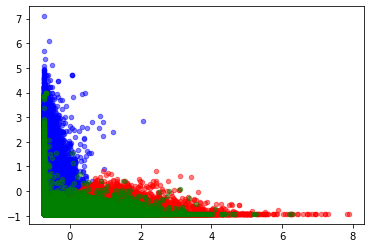

In [76]:
num_clusters = 3
km = KMeans(n_clusters=num_clusters)
km.fit(X_std)
display_cluster(X_std,km,num_clusters)

 #### <a href='#Appendix'>Return to Appendix </a> 

_______________________


# <a name='model'>Models</a>

## classification

In [77]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
data['label'] = labelencoder.fit_transform(data['label'])
data

,label,text,text_clean,cluster
1,2,ممتاز نوعا ما نظافة وموقع وتجهيز وشاطيء مطعم,متاز نوعا نظافة وموقع وتجهيز وشاطيء مطعم,0
2,2,أحد أسباب نجاح امارات أن كل شخص في هذه دولة يع...,اسباب نجاح امارات شخص دولة يعشق ترابها نحب اما...,2
3,2,هادفة وقوية تنقلك من صخب شوارع قاهرة ى هدوء ج...,هادفة وقوية تنقلك صخب شوارع قاهرة هدوء جب شيشا...,2
4,2,خلصنا مبدءيا لي مستني ابهار زي فيل ازرق ميقرا...,خلصنا مبدءيا مستني ابهار زي فيل ازرق ميقراش اح...,2
5,2,ياسات جلوريا جزء لا يتجزأ من دبي فندق متكامل ...,ياسات جلوريا جزء يتجزا دبي فندق متكامل خدمات م...,0
...,...,...,...,...
99995,1,معرفش ليه كنت عاوزة أكماللها وهي مش عاجباني من...,معرفش ليه عاوزة اكمالها وهي عاجباني بدايةقصة ت...,2
99996,1,لا يستحق ان يكون في بوكنق لانه سيء لا شي لا ي...,يستحق يكون بوكنق لانه سيء يوجد خدمة افطار صباح...,0
99997,1,كتاب ضعيف جدا ولم استمتع به فى كل قصه سرد لحه ...,كتاب ضعيف جدا ولم استمتع قصه سرد لحه مشهد بدون...,1
99998,1,مملة جدا محمد حسن علوان فنان بكلمات ووصف عندة ...,ملة جدا محمد حسن علوان فنان بكلمات وصف عندة دق...,2


In [78]:

X = data["text_clean"]
y = data["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 42)

In [79]:
# Count Vector
cv = CountVectorizer(stop_words=stopwords)
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

# TFIDF
tf = TfidfVectorizer(stop_words=stopwords)
X_train_tf = tf.fit_transform(X_train)
X_test_tf = tf.transform(X_test)

# TFIDF
tf_2 = TfidfVectorizer(ngram_range = (1,2), stop_words=stopwords)
X_train_tf_2 = tf.fit_transform(X_train)
X_test_tf_2 = tf.transform(X_test)

In [80]:
models, metric_df = make_exprs([    modeling("LogisticRegression with CV",LogisticRegression(), 
                                             X_train_cv, y_train, X_test_cv, y_test),
                                    modeling("LogisticRegression with TFIDF", LogisticRegression(),
                                             X_train_tf, y_train, X_test_tf, y_test),
                                    modeling("Naive Bayes with CV", MultinomialNB(),
                                             X_train_cv, y_train, X_test_cv, y_test),
                                    modeling("Naive Bayes with TFIDf", MultinomialNB(),
                                             X_train_tf, y_train, X_test_tf, y_test),
#                                     modeling("KNN with CV", KNeighborsClassifier(),
#                                              X_train_cv, y_train, X_test_cv, y_test),
#                                     modeling("KNN with TFIDf", KNeighborsClassifier(),
#                                              X_train_tf, y_train, X_test_tf, y_test)
#                                     modeling("LogisticRegression with TFIDF ngram_range = (1,2)",
#                                              LogisticRegression(), X_train_tf_2, y_train, X_test_tf_2, y_test),
#                                     modeling("Naive Bayes with TFIDF ngram_range = (1,2)",
#                                              MultinomialNB(), X_train_tf_2, y_train, X_test_tf_2, y_test)
                                    ])

################### LogisticRegression with CV ###################
________________ Train Metrics______________
Accuarcy score: 0.920499006237578
Precision Score: 0.920535130788232
Recall Score: 0.9204651351152616
F1 Score: 0.9203102166736229
________________ Test Metrics______________
Accuarcy score: 0.64405
Precision Score: 0.6424793885265773
Recall Score: 0.6445011079427777
F1 Score: 0.6432920789061278
################### LogisticRegression with TFIDF ###################
________________ Train Metrics______________
Accuarcy score: 0.8330104126301578
Precision Score: 0.8327264548738271
Recall Score: 0.8329656126577522
F1 Score: 0.8326915784902935
________________ Test Metrics______________
Accuarcy score: 0.6651
Precision Score: 0.664427204062064
Recall Score: 0.6655037247648793
F1 Score: 0.6648065043017429
################### Naive Bayes with CV ###################
________________ Train Metrics______________
Accuarcy score: 0.8088851110638883
Precision Score: 0.8104057349907993
Rec

In [81]:
metric_df

,Train_acc,Train_prec,Train_recall,Train_fbta,Test_acc,Test_prec,Test_recall,Test_fbta,expr_name
0,0.920499,0.920535,0.920465,0.920310,0.64405,0.642479,0.644501,0.643292,LogisticRegression with CV
1,0.833010,0.832726,0.832966,0.832692,0.66510,0.664427,0.665504,0.664807,LogisticRegression with TFIDF
2,0.808885,0.810406,0.808801,0.808471,0.63085,0.631025,0.631455,0.629685,Naive Bayes with CV
3,0.816548,0.817954,0.816501,0.816676,0.64355,0.646906,0.643960,0.644375,Naive Bayes with TFIDf


In [82]:
models

[LogisticRegression(), LogisticRegression(), MultinomialNB(), MultinomialNB()]

--------------------------------------

 #### <a href='#Appendix'>Return to Appendix </a> 

_______________________


# <a name='Case'>Test Case</a>

In [128]:
# input statment
test_text = ['فلم جميل و اختيار موفق']


# convert to number
test_vector = count_vector.transform(test_text)
test_vector = test_vector.toarray()

## encodeing predict class
text_predict_class = encoder.inverse_transform(model.predict(test_vector))
    
print('is: ',text_predict_class[0])
    

is:  2


 #### <a href='#Appendix'>Return to Appendix </a> 

_______________________


# <a name='con'>Conclusion</a>

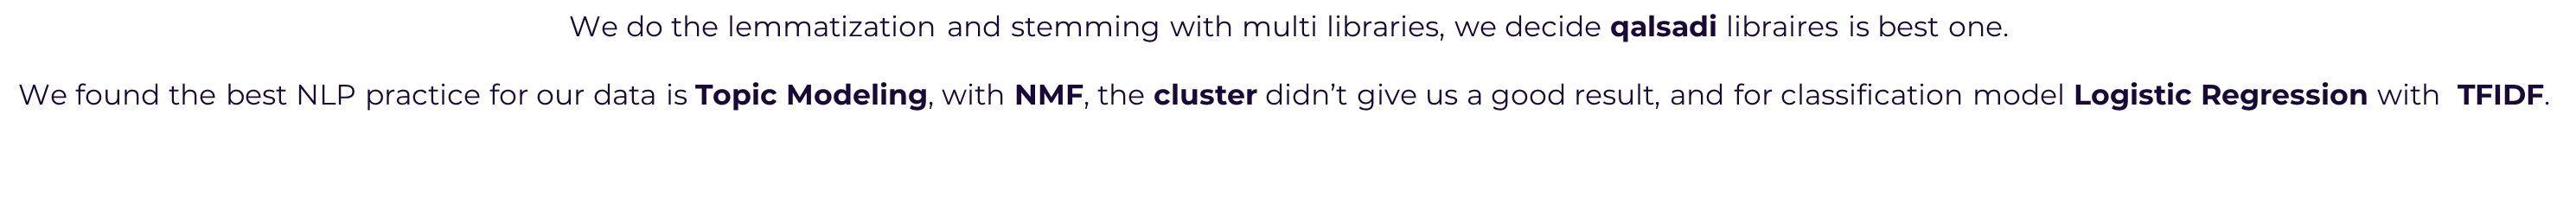

_______________________


 #### <a href='#Appendix'>Return to Appendix </a> 